In [39]:
import pandas as pd


df_task = pd.read_excel("C:\\Users\\User\\Downloads\\DA - Task 1..xlsx", sheet_name="Task")
df_tax = pd.read_excel("C:\\Users\\User\\Downloads\\DA - Task 1..xlsx", sheet_name="Taxonomy")


In [40]:
text_cols = ["Complaint", "Cause", "Correction"]
for col in text_cols:
    df_task[col] = df_task[col].astype(str).str.lower().str.strip()


In [41]:
df_tax.columns = df_tax.columns.str.strip()


In [42]:
root_causes = df_tax['Root Cause'].dropna().str.lower().tolist()
symptom_conditions = df_tax['Symptom Condition'].dropna().str.lower().tolist()
symptom_components = df_tax['Symptom Component'].dropna().str.lower().tolist()
fix_conditions = df_tax['Fix Condition'].dropna().str.lower().tolist()
fix_components = df_tax['Fix Component'].dropna().str.lower().tolist()



In [43]:
from rapidfuzz import fuzz

def find_best_match(text, category_list, threshold=80):
    best_match = ""
    best_score = 0
    for cat in category_list:
        score = fuzz.partial_ratio(text, cat)
        if score > best_score and score >= threshold:
            best_match = cat
            best_score = score
    return best_match
# find_best_match(text = "on",
# category_list= ["premium calculation", "policy check", "billing validation"]
# )


In [44]:
def tag_row(row):
    complaint = row['Complaint']
    cause = row['Cause']
    correction = row['Correction']
    
    return pd.Series({
        'Symptom_Condition': find_best_match(complaint, symptom_conditions),
        'Symptom_Component': find_best_match(complaint, symptom_components),
        'Root Cause': find_best_match(cause, root_causes),
        'Fix_Condition': find_best_match(correction, fix_conditions),
        'Fix_Component': find_best_match(correction, fix_components)
    })

df_tags = df_task.apply(tag_row, axis=1)
df_tagged = pd.concat([df_task, df_tags], axis=1)


In [45]:
import pandas as pd

# Load your original Excel file path
input_path = r"C:\\Users\\User\\Downloads\\DA - Task 1..xlsx"  # Use raw string to avoid backslash errors

# Name your output sheet
output_sheet_name = "Tagged_Output"

# Use openpyxl engine to modify existing Excel file and write to a new sheet
with pd.ExcelWriter(input_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df_task.to_excel(writer, sheet_name=output_sheet_name, index=False)


In [49]:
import pandas as pd

# Load the Excel file
file_path = "C:\\Users\\User\\Downloads\\DA -Task 2..xlsx"
df = pd.read_excel(file_path)

# Collect column-wise information
summary = []
for col in df.columns:
    data_type = df[col].dtype
    missing_pct = df[col].isnull().mean() * 100
    unique_vals = df[col].nunique()
    example_vals = df[col].dropna().unique()[:3]
    
    summary.append({
        "Column Name": col,
        "Data Type": str(data_type),
        "Missing %": round(missing_pct, 2),
        "Unique Values": unique_vals,
        "Example Values": example_vals
    })

# Create a DataFrame summary
df_summary = pd.DataFrame(summary)

# Save to Excel
df_summary.to_excel("C:\\Users\\User\\Downloads\\task2.xlsx", index=False)


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# Load the data
file_path ="C:\\Users\\User\\Downloads\\DA -Task 2..xlsx"
df = pd.read_excel(file_path)

# Step 1: View basic info and nulls
print("Initial Shape:", df.shape)
print("\nMissing Values Per Column:\n", df.isnull().sum())

# Step 2: Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]
print("\nShape after dropping high-null columns:", df.shape)

# Step 3: Fill remaining missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

# Step 4: Clean categorical columns (standardize strings)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

# Step 5: Convert numeric columns to proper format
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            continue

# Step 6: Remove outliers using Z-score (optional, skip if not needed)
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
print("\nShape after outlier removal:", df.shape)

# Step 7: Save cleaned data
output_path = "C:\\Users\\User\\Downloads\\task2.xlsx"

output_sheet_name = "cleansing_Output"

# Use openpyxl engine to modify existing Excel file and write to a new sheet
with pd.ExcelWriter(output_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name=output_sheet_name, index=False)



KeyboardInterrupt: 

In [ ]:


# Load the data
file_path ="C:\\Users\\User\\Downloads\\DA -Task 2..xlsx"
df = pd.read_excel(file_path)

# Step 1: View basic info and nulls
print("Initial Shape:", df.shape)
print("\nMissing Values Per Column:\n", df.isnull().sum())

# Step 2: Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]
print("\nShape after dropping high-null columns:", df.shape)

# Step 3: Fill remaining missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

# Step 4: Clean categorical columns (standardize strings)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

# Step 5: Convert numeric columns to proper format
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            continue

# Step 6: Remove outliers using Z-score (optional, skip if not needed)
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]
print("\nShape after outlier removal:", df.shape)

# Step 7: Save cleaned data
output_path = "C:\\Users\\User\\Downloads\\task2.xlsx"

output_sheet_name = "cleansing_Output"

# Use openpyxl engine to modify existing Excel file and write to a new sheet
with pd.ExcelWriter(output_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name=output_sheet_name, index=False)



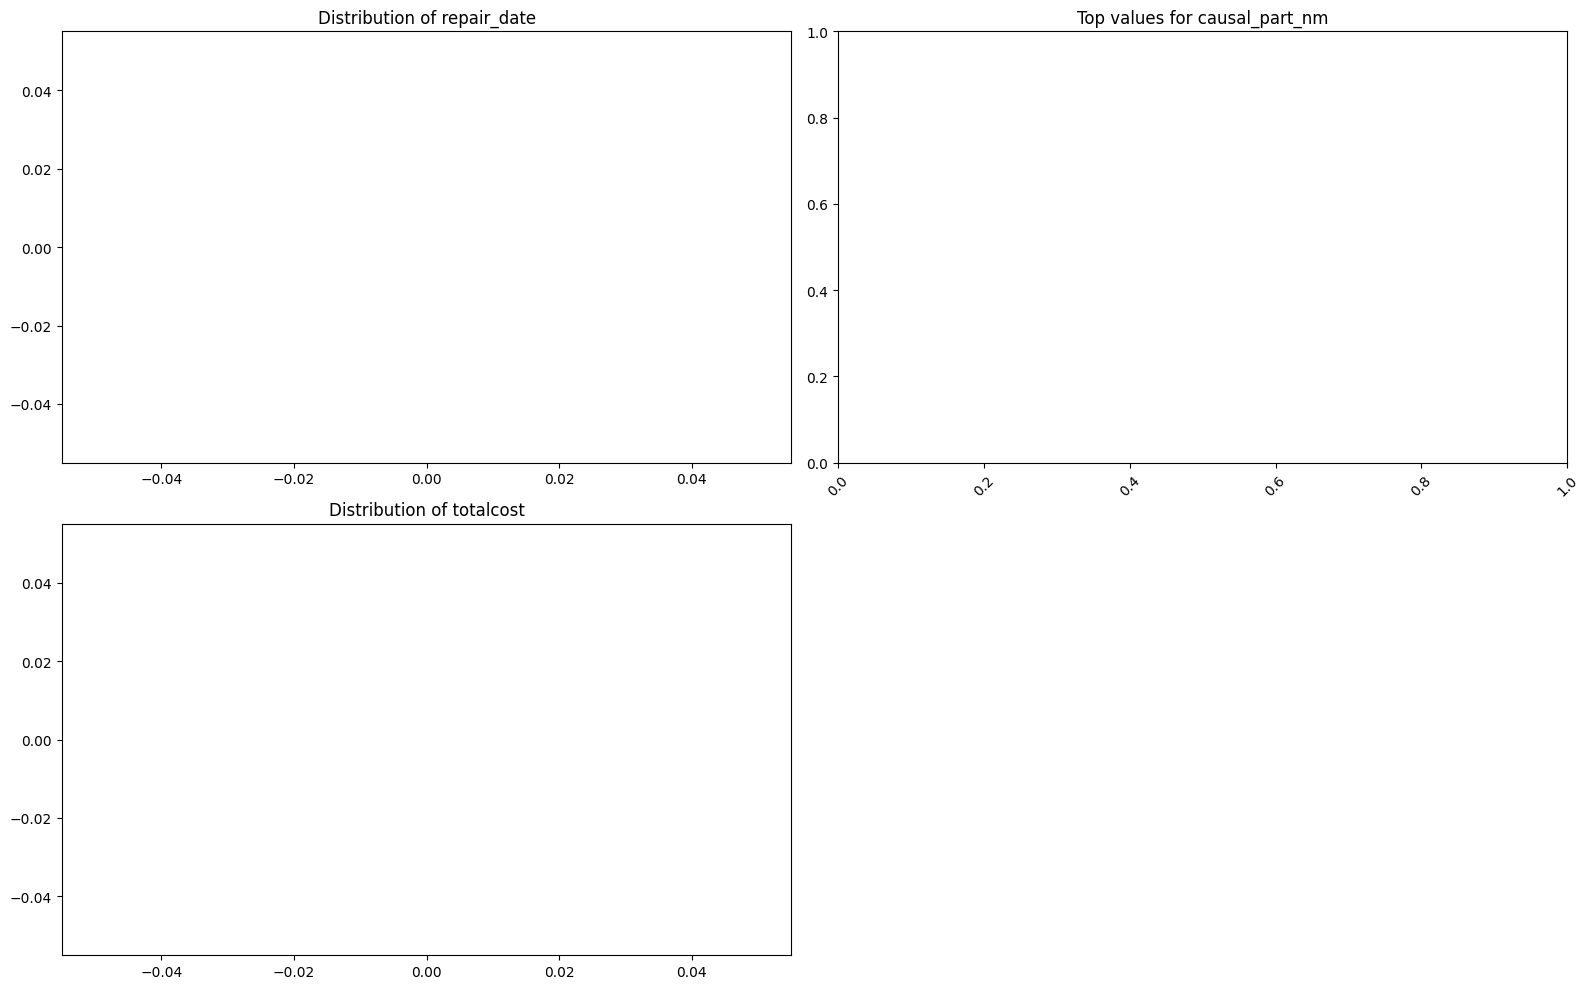

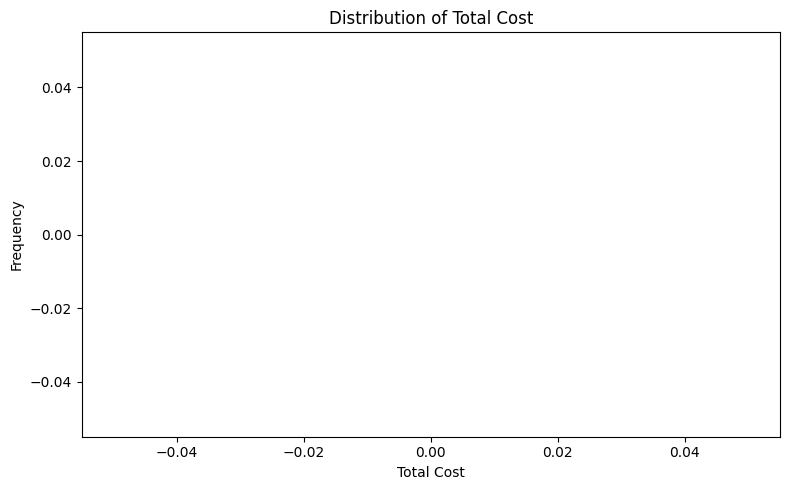

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the column names first
df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip()

# Use the cleaned column names
cols = ['repair_date', 'causal_part_nm', 'totalcost', 'vin_modl_desgtr']

# Count plots for the first 3 categorical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(cols[:-1]):  # Skip the last one for the next chart
    plt.subplot(2, 2, i + 1)
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
        plt.title(f"Top values for {col}")
        plt.xticks(rotation=45)
    else:
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")

plt.tight_layout()

# Histogram for 'totalcost'
plt.figure(figsize=(8, 5))
sns.histplot(df['totalcost'], bins=30, kde=True)
plt.title("Distribution of Total Cost")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:

from PIL import Image

print("Pillow is working!")


Pillow is working!


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from openpyxl import Workbook
from openpyxl.drawing.image import Image as XLImage
from PIL import Image

# Step 1: Load the dataset
file_path  = "C:\\Users\\User\\Downloads\\DA -Task 2..xlsx"
df = pd.read_excel(file_path)

# Step 2: Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip()

# Check actual column names
print("Available columns:\n", df.columns.tolist())

# Step 3: Define columns for plots (make sure they exist)
# Replace column names if different in your data
plot_cols = {
    'causal_part_nm': 'Top 10 Causal Parts',
    'vin_modl_desgtr': 'Top 10 VIN Models',
    'totalcost': 'Total Cost Distribution'
}

# Step 4: Create plots and save as images
plots = []
for col, title in plot_cols.items():
    plt.figure(figsize=(10, 5))
    
    if col == 'totalcost':
        sns.histplot(df[col], bins=30, kde=True)
        plt.xlabel('Total Cost')
        plt.ylabel('Frequency')
    else:
        sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.title(title)
    filename = f"{col}_plot.png"
    plt.tight_layout()
    plt.savefig(filename)
    plots.append(filename)
    plt.close()

# Step 5: Save plots to a new Excel workbook
wb = Workbook()
ws = wb.active
ws.title = "Visualizations"

# Add images to Excel sheet
for i, plot in enumerate(plots, start=1):
    img = XLImage(plot)
    img.anchor = f"A{(i - 1) * 20 + 1}"  # Spacing between images
    ws.add_image(img)

# Save workbook
output_excel = "C:\\Users\\User\\Downloads\\task2.1.xlsx"
wb.save(output_excel)
print(f"Visual report saved to {output_excel}")

# Optional: clean up .png files
for plot in plots:
    os.remove(plot)


Available columns:
 ['vin', 'transaction_id', 'correction_verbatim', 'customer_verbatim', 'repair_date', 'causal_part_nm', 'global_labor_code_description', 'platform', 'body_style', 'vppc', 'plant', 'build_country', 'last_known_dlr_name', 'last_known_dlr_city', 'repairing_dealer_code', 'dealer_name', 'repair_dlr_city', 'state', 'dealer_region', 'repair_dlr_postal_cd', 'repair_age', 'km', 'complaint_cd_csi', 'complaint_cd', 'veh_test_grp', 'country_sale_iso', 'ord_selling_src_cd', 'optn_famly_certification', 'optf_famly_emissiof_system', 'global_labor_code', 'transaction_category', 'campaign_nbr', 'reporting_cost', 'totalcost', 'lbrcost', 'engine', 'engine_desc', 'transmission', 'transmission_desc', 'engine_source_plant', 'engine_trace_nbr', 'transmission_source_plant', 'transmission_trace_nbr', 'src_txn_id', 'src_ver_nbr', 'transaction_cntr', 'media_flag', 'vin_modl_desgtr', 'line_series', 'last_known_delvry_type_cd', 'non_causal_part_qty', 'sales_region_code']
Visual report saved to C

In [11]:
import pandas as pd

df = pd.read_excel("C:\\Users\\User\\Downloads\\DA -Task 2..xlsx")
print(df.columns.tolist())


['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']


In [13]:
df.columns = df.columns.str.strip().str.upper()  # remove extra spaces and standardize case

# Now reference using uppercase
df['FAILURE_CONDITION_TAG'] = df['CUSTOMER_VERBATIM'].apply(lambda x: extract_tags(x, failure_keywords))
df['COMPONENT_TAG'] = df['CORRECTION_VERBATIM'].apply(lambda x: extract_tags(x, component_keywords))
print(df.columns)


Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

In [21]:
import pandas as pd

# Load the Excel
input_path = "C:\\Users\\User\\Downloads\\DA -Task 2..xlsx"
df = pd.read_excel(input_path)

# Clean column names to uppercase
df.columns = df.columns.str.strip().str.upper()

# Define keyword lists
failure_keywords = [
    'noise', 'stall', 'leak', 'overheat', 'vibration', 'rough idle',
    'hard start', 'no start', 'smoke', 'low power', 'jerk', 'hesitation',
    'misfire', 'knocking'
]

component_keywords = [
    'engine', 'transmission', 'radiator', 'turbo', 'brake', 'gearbox',
    'alternator', 'battery', 'sensor', 'ECU', 'fuel pump', 'clutch', 'injector'
]

# Tagging function
def extract_tags(text, keywords):
    if pd.isna(text):
        return ''
    text = str(text).lower()
    tags = [kw for kw in keywords if kw in text]
    return ', '.join(tags)

# Apply tags (make sure columns exist after .upper())
df['FAILURE_CONDITION_TAG'] = df['CUSTOMER_VERBATIM'].apply(lambda x: extract_tags(x, failure_keywords))
df['COMPONENT_TAG'] = df['CORRECTION_VERBATIM'].apply(lambda x: extract_tags(x, component_keywords))

# Save as new sheet in the same Excel file
with pd.ExcelWriter(input_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df.to_excel(writer, sheet_name='Step4_Tagging', index=False)
